In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.signal

def exp_ker(t, tau):
    return np.exp(-t/tau)/tau

# Problem size
T_SIGNAL = 10
T_KERNEL = T_SIGNAL / 2

DT = 0.01
t_signal = np.arange(0, T_SIGNAL + DT, DT)
t_kernel = np.arange(0, T_KERNEL + DT, DT)
NPOINT = len(t_signal)

# Box Signal
signal = np.zeros(NPOINT)
signal[np.sin(t_signal - 1.5)**2 > 0.5] = 1

# Kernel
TAU = 1.0
kernel = exp_ker(t_kernel, TAU)
kernel /= np.sum(kernel)

# Convolve
sig_conv = scipy.signal.convolve(signal, kernel, mode='full')[:NPOINT]

# Manual Deconvolution

Power of Tikhonov Regularization (aka Ridge Regression) - lose some accuracy due to temporal blur, but gain significant resistence to noise.

/opt/anaconda3/envs/py36qt5/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


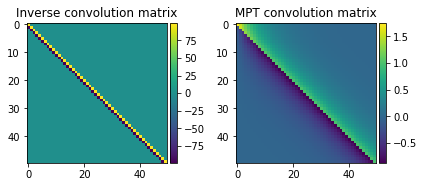

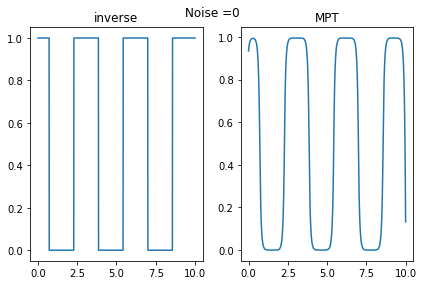

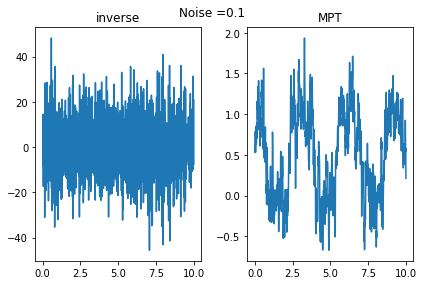

In [9]:
def imshow_ax(fig, ax, mat):
    im = ax.imshow(mat)
    div = make_axes_locatable(ax)
    divAx = div.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=divAx, orientation='vertical')

def kernelMatrix(kernel, nSig):
    nKer = len(kernel)
    H = np.zeros((nSig, nSig))
    for i in range(nSig):
        l = np.max([i+1-nKer, 0])
        r = i+1
        H[i, l:r] = np.flip(kernel[:r])
    return H

# Moore-Penrose pseudoinverse
def moorePenroseTikhonov(H, reg=0.005):
    return np.linalg.inv(H.T.dot(H) + reg*np.eye(H.shape[0])).dot(H.T)

H = kernelMatrix(kernel, len(sig_conv))
H_inv = np.linalg.inv(H)
H_pseudo = moorePenroseTikhonov(H)

fig, ax = plt.subplots(ncols=2, tight_layout=True)
imshow_ax(fig, ax[0], H_inv[:50, :50])
imshow_ax(fig, ax[1], H_pseudo[:50, :50])
ax[0].set_title('Inverse convolution matrix')
ax[1].set_title('MPT convolution matrix')

for noise in [0, 0.1]:
    sig = sig_conv + noise * np.random.normal(0, 1, len(sig_conv))

    fig, ax = plt.subplots(ncols=2, tight_layout=True)
    fig.suptitle('Noise ='+ str(noise))
    rez = H_inv.dot(sig)
    rezNoisy = H_pseudo.dot(sig)
    ax[0].plot(t_signal, rez)
    ax[1].plot(t_signal, rezNoisy)
    ax[0].set_title('inverse')
    ax[1].set_title('MPT')
    plt.show()
    